In [1]:
#Importing the necessary modules for loading the data set

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pickle

# Data Collecting

In [2]:
#Reading the data set and storing in df 

df=pd.read_csv(r'C:\Users\Tarun\Desktop\JOBS\PRUDENT\Sales_Data.csv')

In [3]:
df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544.0,01-11-2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,07-05-2010,301644504.0,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,09-12-2011,478051030.0,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952.0,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596.0,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Australia and Oceania,New Zealand,Household,Offline,C,04-03-2015,217984473.0,4/20/2015,5305,668.27,502.54,3545172.35,2665974.70,879197.65
4996,Middle East and North Africa,Azerbaijan,Clothes,Offline,L,8/17/2014,169748055.0,10-02-2014,1077,109.28,35.84,117694.56,38599.68,79094.88
4997,Asia,Myanmar,Baby Food,Offline,H,11/23/2016,NaN,12-10-2016,5204,255.28,159.42,1328477.12,829621.68,498855.44
4998,Europe,Finland,Clothes,Online,L,4/22/2014,NaN,05-11-2014,9410,109.28,35.84,1028324.80,337254.40,691070.40


In [4]:
#Brief info about the dataset i.e,number of rows & columns , any missing values , data types of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             5000 non-null   object 
 1   Country            5000 non-null   object 
 2   Item_Type          4989 non-null   object 
 3   Sales_Channel      5000 non-null   object 
 4   Order_Priority     5000 non-null   object 
 5   Order_Date         5000 non-null   object 
 6   Order_ID           4997 non-null   float64
 7   Ship_Date          5000 non-null   object 
 8   Units_Sold         5000 non-null   int64  
 9   Unit_SellingPrice  5000 non-null   float64
 10  Unit_MakingCost    5000 non-null   float64
 11  Total_Revenue      5000 non-null   float64
 12  Total_Cost         5000 non-null   float64
 13  Total_Profit       5000 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 547.0+ KB


# Data Cleaning(Preprocessing)

In [5]:
# These are the rows which has order ID has NaN value insted of original value

df[df["Order_ID"].isna()]

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit
4997,Asia,Myanmar,Baby Food,Offline,H,11/23/2016,NaN,12-10-2016,5204,255.28,159.42,1328477.12,829621.68,498855.44
4998,Europe,Finland,Clothes,Online,L,4/22/2014,NaN,05-11-2014,9410,109.28,35.84,1028324.80,337254.40,691070.40
4999,Sub-Saharan Africa,Tanzania,Vegetables,Online,L,07-08-2011,NaN,08-07-2011,2450,154.06,90.93,377447.00,222778.50,154668.50


In [6]:
#These are the rows which has Item type as NaN value instead of original value

df[df["Item_Type"].isna()]

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit
4980,Asia,Indonesia,NaN,Offline,L,12-05-2010,328383767.0,12/18/2010,4909,81.73,56.67,401212.57,278193.03,123019.54
4981,Sub-Saharan Africa,Eritrea,NaN,Online,H,03-07-2015,354593455.0,04-03-2015,938,651.21,524.96,610834.98,492412.48,118422.50
4982,Middle East and North Africa,Iran,NaN,Offline,H,8/21/2016,265185773.0,10-05-2016,3218,47.45,31.79,152694.10,102300.22,50393.88
4983,Asia,South Korea,NaN,Online,M,07-03-2010,422709548.0,08-04-2010,8004,109.28,35.84,874677.12,286863.36,587813.76
4984,Asia,Cambodia,NaN,Offline,L,10-03-2015,810026109.0,10/18/2015,3581,154.06,90.93,551688.86,325620.33,226068.53
4985,Asia,Laos,NaN,Offline,L,10/13/2010,580309283.0,10/25/2010,5268,437.20,263.33,2303169.60,1387222.44,915947.16
4986,Asia,Sri Lanka,NaN,Online,C,12-01-2012,307045400.0,12-02-2012,412,651.21,524.96,268298.52,216283.52,52015.00
4987,Europe,Norway,NaN,Offline,M,1/14/2014,634033286.0,1/15/2014,3394,81.73,56.67,277391.62,192337.98,85053.64
4988,Middle East and North Africa,United Arab Emirates,NaN,Online,H,8/31/2014,925384271.0,10-12-2014,625,668.27,502.54,417668.75,314087.50,103581.25
4989,Asia,Thailand,NaN,Online,C,08-08-2012,615522181.0,9/20/2012,5547,152.58,97.44,846361.26,540499.68,305861.58


#We are having null values in Item type column(11) and order_id columns(3) total of 14 rows

#As we cant impute any value to missing orderID and Item type with any statistutical imputation methods like mean median and mode we are going to drop the rows with null values

In [7]:
#We are droping the rows and storing the dataset itno df_final

df_final=df.dropna()

In [8]:
df_final

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544.0,01-11-2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,07-05-2010,301644504.0,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,09-12-2011,478051030.0,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952.0,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596.0,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,Middle East and North Africa,Iran,Clothes,Offline,L,07-11-2014,927583253.0,8/30/2014,1352,109.28,35.84,147746.56,48455.68,99290.88
4993,Europe,Denmark,Clothes,Offline,H,05-09-2012,713357150.0,06-03-2012,7088,109.28,35.84,774576.64,254033.92,520542.72
4994,Sub-Saharan Africa,Liberia,Cosmetics,Offline,M,6/17/2012,374724614.0,6/23/2012,8195,437.20,263.33,3582854.00,2157989.35,1424864.65
4995,Australia and Oceania,New Zealand,Household,Offline,C,04-03-2015,217984473.0,4/20/2015,5305,668.27,502.54,3545172.35,2665974.70,879197.65


In [9]:
#After droping the null value rows we are havung a dataset of 4986 rows and 14 columns
#We are checking for any null values in final data set
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4986 entries, 0 to 4996
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             4986 non-null   object 
 1   Country            4986 non-null   object 
 2   Item_Type          4986 non-null   object 
 3   Sales_Channel      4986 non-null   object 
 4   Order_Priority     4986 non-null   object 
 5   Order_Date         4986 non-null   object 
 6   Order_ID           4986 non-null   float64
 7   Ship_Date          4986 non-null   object 
 8   Units_Sold         4986 non-null   int64  
 9   Unit_SellingPrice  4986 non-null   float64
 10  Unit_MakingCost    4986 non-null   float64
 11  Total_Revenue      4986 non-null   float64
 12  Total_Cost         4986 non-null   float64
 13  Total_Profit       4986 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 584.3+ KB


In [10]:
#FINDING DUPLICATE ROWS

duplicate_rows = df_final.duplicated()
duplicate_rows.value_counts()

False    4986
dtype: int64

We are not having any duplicate rows which affect our analysis

In [11]:
df_final.reset_index()

,index,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit
0,0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544.0,01-11-2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,1,Central America and the Caribbean,Panama,Snacks,Offline,C,07-05-2010,301644504.0,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,2,Europe,Czech Republic,Beverages,Offline,C,09-12-2011,478051030.0,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952.0,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596.0,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,4992,Middle East and North Africa,Iran,Clothes,Offline,L,07-11-2014,927583253.0,8/30/2014,1352,109.28,35.84,147746.56,48455.68,99290.88
4982,4993,Europe,Denmark,Clothes,Offline,H,05-09-2012,713357150.0,06-03-2012,7088,109.28,35.84,774576.64,254033.92,520542.72
4983,4994,Sub-Saharan Africa,Liberia,Cosmetics,Offline,M,6/17/2012,374724614.0,6/23/2012,8195,437.20,263.33,3582854.00,2157989.35,1424864.65
4984,4995,Australia and Oceania,New Zealand,Household,Offline,C,04-03-2015,217984473.0,4/20/2015,5305,668.27,502.54,3545172.35,2665974.70,879197.65


In [12]:
df_final.describe()

,Order_ID,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit
count,4.986000e+03,4986.000000,4986.000000,4986.000000,4.986000e+03,4.986000e+03,4.986000e+03
mean,5.485942e+08,5033.473325,265.737822,187.501462,1.327417e+06,9.345197e+05,3.928978e+05
std,2.594849e+08,2915.077154,218.705378,176.396933,1.476827e+06,1.152049e+06,3.831929e+05
min,1.000909e+08,2.000000,9.330000,6.920000,6.531000e+01,4.844000e+01,1.687000e+01
25%,3.201010e+08,2454.750000,81.730000,35.840000,2.566244e+05,1.542037e+05,8.525892e+04
50%,5.522409e+08,5125.000000,154.060000,97.440000,7.806591e+05,4.694572e+05,2.792419e+05
75%,7.687178e+08,7577.000000,437.200000,263.330000,1.843361e+06,1.198965e+06,5.651643e+05
max,9.998797e+08,9999.000000,668.270000,524.960000,6.672676e+06,5.248025e+06,1.726007e+06


<function matplotlib.pyplot.show(close=None, block=None)>

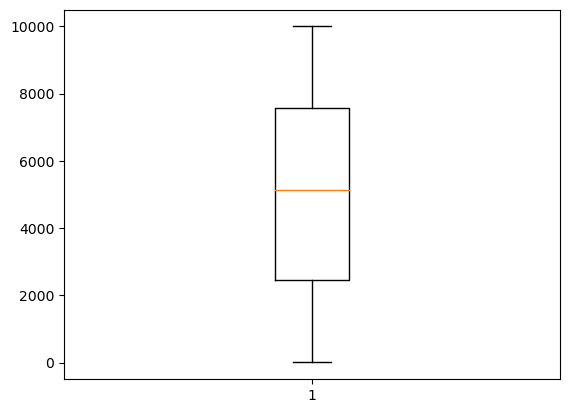

In [13]:
#FINDING OUTLIERS

plt.boxplot(df_final["Units_Sold"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

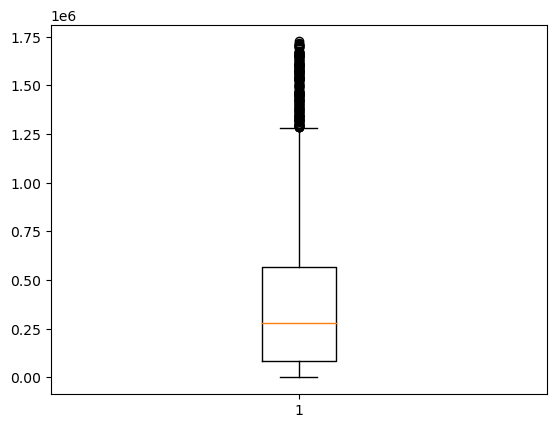

In [14]:
plt.boxplot(df_final["Total_Profit"])
plt.show

#Here we can observe that there are outliers but we should remove them because here outliers represents that profits are high 

# EXPLORATORY DATA ANALYSIS(EDA)

Now we are going to understand the data like follows

# Univariate Analysis

In [15]:
#We are having more number of orders from Europe region and least number of orders from North American region

df_final['Region'].value_counts()

Europe                               1327
Sub-Saharan Africa                   1283
Asia                                  712
Middle East and North Africa          608
Central America and the Caribbean     534
Australia and Oceania                 416
North America                         106
Name: Region, dtype: int64

<Axes: >

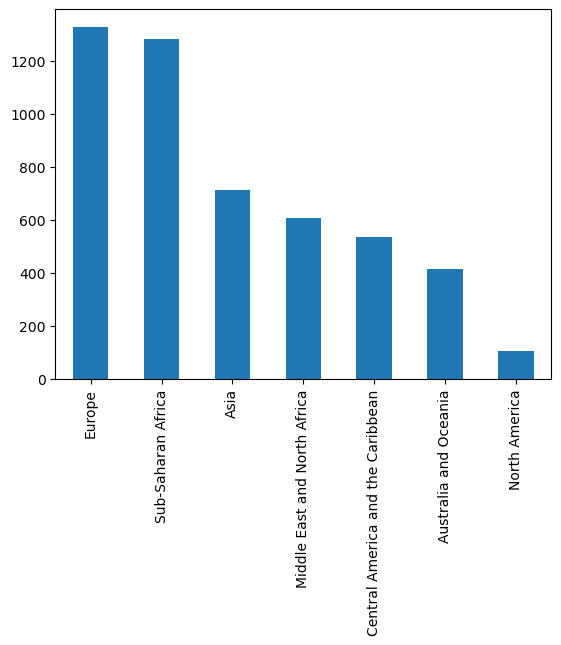

In [16]:
df_final['Region'].value_counts().plot(kind="bar")

In [17]:
#We are having more orders from Andorra and san Marino countries and least number of orders from Monaco Country

df_final['Country'].value_counts()

Andorra                     40
San Marino                  40
Mauritius                   38
United States of America    38
Ghana                       38
                            ..
Dominica                    18
Angola                      16
Mongolia                    15
Cape Verde                  14
Monaco                      13
Name: Country, Length: 185, dtype: int64

In [18]:
# most ordered item is fruits and less ordered items are clothes and cereal

df_final['Item_Type'].value_counts()

Fruits             447
Beverages          446
Baby Food          444
Cosmetics          423
Household          423
Office Supplies    418
Personal Care      413
Vegetables         408
Meat               399
Snacks             397
Cereal             384
Clothes            384
Name: Item_Type, dtype: int64

<Axes: >

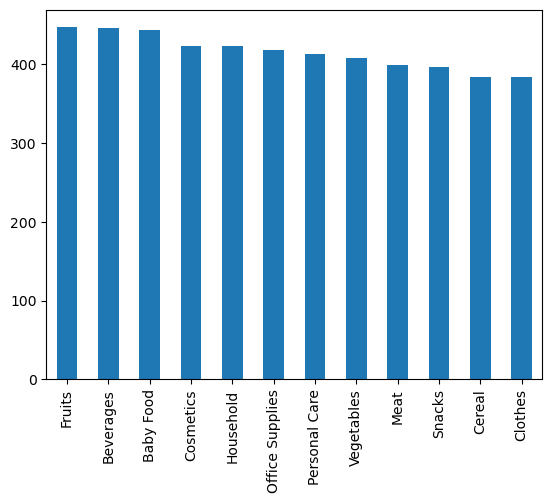

In [19]:
df_final['Item_Type'].value_counts().plot(kind="bar")

In [20]:
# Most preffered sales channel is offline mode

df_final['Sales_Channel'].value_counts()

Offline    2497
Online     2489
Name: Sales_Channel, dtype: int64

# Bivariate Analysis

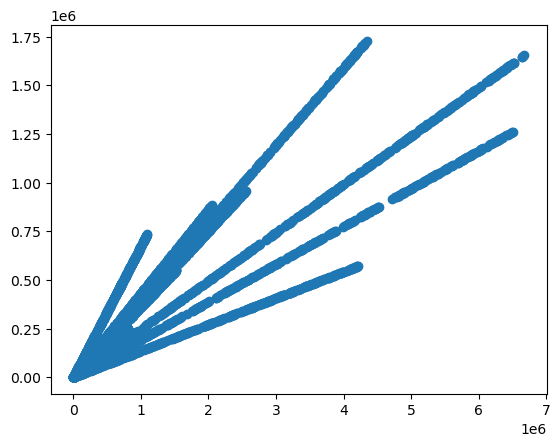

In [21]:
#Scatter plot can be used on only numerical vs numerical data only

plt.scatter(df_final["Total_Revenue"],df_final["Total_Profit"])

We can observe that as the revenue Increases profit also increases linearly

In [22]:
#For better Analysing i am adding a new column order year which is extracted from the order data column 


df_final["Order_Date"]=pd.to_datetime(df_final["Order_Date"])

C:\Users\Tarun\AppData\Local\Temp\ipykernel_30652\2193319390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Order_Date"]=pd.to_datetime(df_final["Order_Date"])


In [23]:
df_final['Order_Year']=df_final["Order_Date"].dt.year

C:\Users\Tarun\AppData\Local\Temp\ipykernel_30652\2565105102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Order_Year']=df_final["Order_Date"].dt.year


In [24]:
df_final

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit,Order_Year
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544.0,01-11-2014,552,255.28,159.42,140914.56,87999.84,52914.72,2013
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504.0,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38,2010
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030.0,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48,2011
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952.0,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2010
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596.0,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,Middle East and North Africa,Iran,Clothes,Offline,L,2014-07-11,927583253.0,8/30/2014,1352,109.28,35.84,147746.56,48455.68,99290.88,2014
4993,Europe,Denmark,Clothes,Offline,H,2012-05-09,713357150.0,06-03-2012,7088,109.28,35.84,774576.64,254033.92,520542.72,2012
4994,Sub-Saharan Africa,Liberia,Cosmetics,Offline,M,2012-06-17,374724614.0,6/23/2012,8195,437.20,263.33,3582854.00,2157989.35,1424864.65,2012
4995,Australia and Oceania,New Zealand,Household,Offline,C,2015-04-03,217984473.0,4/20/2015,5305,668.27,502.54,3545172.35,2665974.70,879197.65,2015


<Axes: xlabel='Order_Year', ylabel='Units_Sold'>

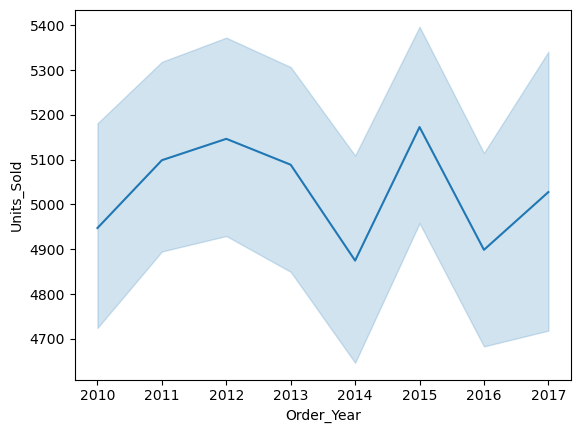

In [25]:
sns.lineplot(x = "Order_Year", y = "Units_Sold", data = df_final)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_30652\3531305193.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


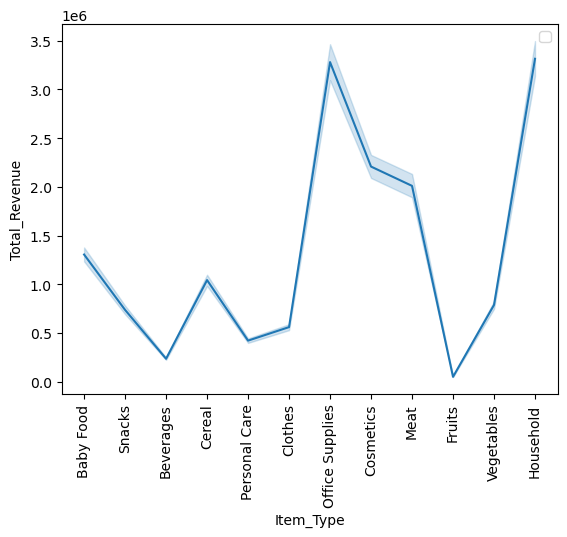

In [26]:
my_plot=sns.lineplot(x = "Item_Type", y = "Total_Revenue", data = df_final)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
plt.legend()

#From the above Line plot we can observe that office supplies and houshold items made the highest revenue

C:\Users\Tarun\AppData\Local\Temp\ipykernel_30652\1502978119.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


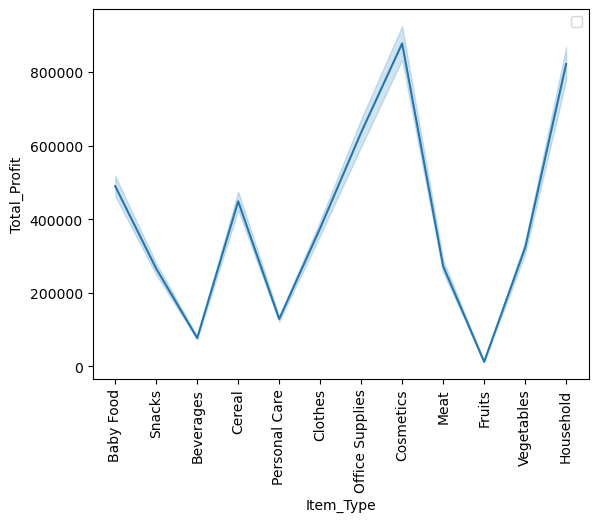

In [27]:
my_plot=sns.lineplot(x = "Item_Type", y = "Total_Profit", data = df_final)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
plt.legend()

#From the above lineplot we can observe that the cosmetics and houdehold items has generated highest profits

C:\Users\Tarun\AppData\Local\Temp\ipykernel_30652\2553917890.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


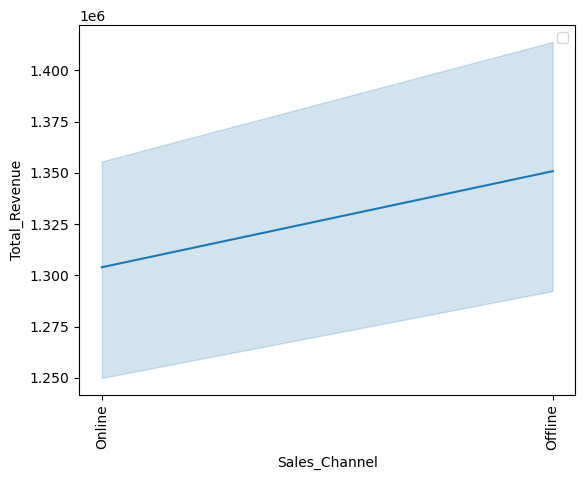

In [28]:
my_plot=sns.lineplot(x = "Sales_Channel", y = "Total_Revenue", data = df_final)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
plt.legend()

From the above lineplot we can observe that offine mode of orders made highest revenue

C:\Users\Tarun\AppData\Local\Temp\ipykernel_30652\1295938289.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


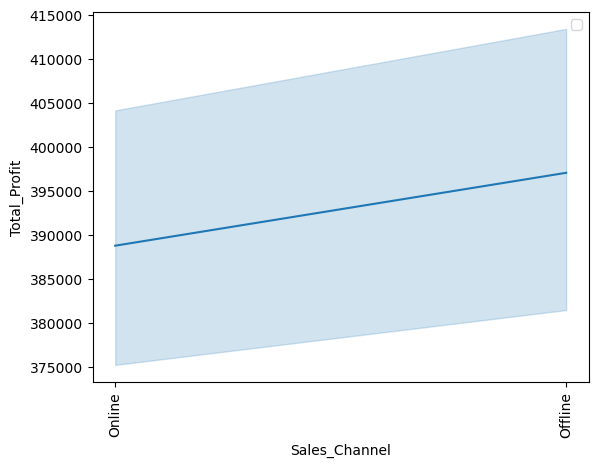

In [29]:
my_plot=sns.lineplot(x = "Sales_Channel", y = "Total_Profit", data = df_final)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
plt.legend()

we can observe that offline stores generated more profits than online sales

# Multivariate

C:\Users\Tarun\AppData\Local\Temp\ipykernel_30652\1194232717.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot=True)


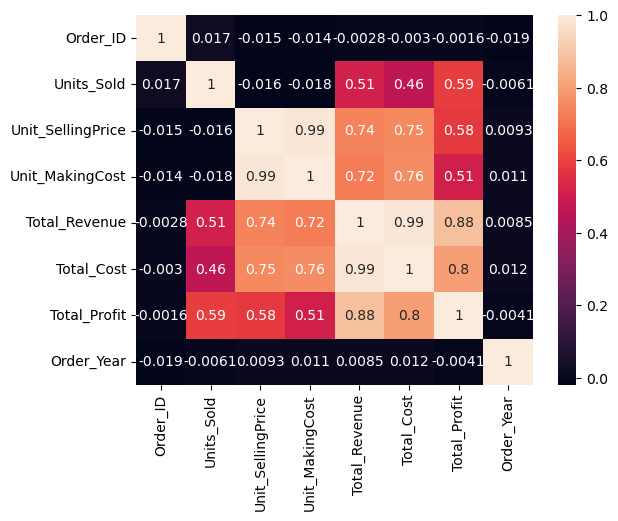

In [30]:
#Heat map can be used only on numerical data

sns.heatmap(df_final.corr(), annot=True)
plt.show()

#Heat map shows how columns are related to each other

From the above heatmap we can understand that unit_selling_price is more related to unit_makingcost(0.99)

From the above scatter from we observed that revenue is linear to profit as we can see in heat map both are corelated to each other (0.88)

# Regression models

Firstly we are dividing the final dataframe into two different dataframes which consists all the numerical data in on dataframe and categorical data into another dataframe 

For training a model we need that dat only in numerical format that is why we divided in two seperate dataframes and then we convert the categorical dataframe into numerical with onehotencoder and simple imputation methods.

Then we combine both the dataframes with a pipeline and then train the model and complete the evaluation metrics 

For building the model we split the data into 3 parts x_train,x_cv,x_test

x_train=training model
x_cv=for testing performance of model
x_test = for finding final model accuracy or generalized model accuracy

For finding the Genaralized accuracy the model shouldnt seen the data before for that we are splitting the data into two parts first x_train and x_test

Then we never use x_test data till the final model accuracy calculation or best model

For finding best model we again split the x_train data into x_train and x_cv

In [31]:
df_final

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit,Order_Year
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544.0,01-11-2014,552,255.28,159.42,140914.56,87999.84,52914.72,2013
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504.0,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38,2010
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030.0,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48,2011
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952.0,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2010
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596.0,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,Middle East and North Africa,Iran,Clothes,Offline,L,2014-07-11,927583253.0,8/30/2014,1352,109.28,35.84,147746.56,48455.68,99290.88,2014
4993,Europe,Denmark,Clothes,Offline,H,2012-05-09,713357150.0,06-03-2012,7088,109.28,35.84,774576.64,254033.92,520542.72,2012
4994,Sub-Saharan Africa,Liberia,Cosmetics,Offline,M,2012-06-17,374724614.0,6/23/2012,8195,437.20,263.33,3582854.00,2157989.35,1424864.65,2012
4995,Australia and Oceania,New Zealand,Household,Offline,C,2015-04-03,217984473.0,4/20/2015,5305,668.27,502.54,3545172.35,2665974.70,879197.65,2015


In [32]:
del df_final['Order_ID']
del df_final['Order_Priority']
del df_final['Order_Date']
del df_final['Ship_Date']

In [33]:
df_final

,Region,Country,Item_Type,Sales_Channel,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit,Order_Year
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,552,255.28,159.42,140914.56,87999.84,52914.72,2013
1,Central America and the Caribbean,Panama,Snacks,Offline,2167,152.58,97.44,330640.86,211152.48,119488.38,2010
2,Europe,Czech Republic,Beverages,Offline,4778,47.45,31.79,226716.10,151892.62,74823.48,2011
3,Asia,North Korea,Cereal,Offline,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2010
4,Asia,Sri Lanka,Snacks,Offline,7542,152.58,97.44,1150758.36,734892.48,415865.88,2015
...,...,...,...,...,...,...,...,...,...,...,...
4992,Middle East and North Africa,Iran,Clothes,Offline,1352,109.28,35.84,147746.56,48455.68,99290.88,2014
4993,Europe,Denmark,Clothes,Offline,7088,109.28,35.84,774576.64,254033.92,520542.72,2012
4994,Sub-Saharan Africa,Liberia,Cosmetics,Offline,8195,437.20,263.33,3582854.00,2157989.35,1424864.65,2012
4995,Australia and Oceania,New Zealand,Household,Offline,5305,668.27,502.54,3545172.35,2665974.70,879197.65,2015


In [34]:
#fv=Feature Variable,cv=Class variable


fv=df_final.iloc[:,0:15]
cv=df_final.iloc[:,-2]

In [35]:
fv

,Region,Country,Item_Type,Sales_Channel,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit,Order_Year
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,552,255.28,159.42,140914.56,87999.84,52914.72,2013
1,Central America and the Caribbean,Panama,Snacks,Offline,2167,152.58,97.44,330640.86,211152.48,119488.38,2010
2,Europe,Czech Republic,Beverages,Offline,4778,47.45,31.79,226716.10,151892.62,74823.48,2011
3,Asia,North Korea,Cereal,Offline,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2010
4,Asia,Sri Lanka,Snacks,Offline,7542,152.58,97.44,1150758.36,734892.48,415865.88,2015
...,...,...,...,...,...,...,...,...,...,...,...
4992,Middle East and North Africa,Iran,Clothes,Offline,1352,109.28,35.84,147746.56,48455.68,99290.88,2014
4993,Europe,Denmark,Clothes,Offline,7088,109.28,35.84,774576.64,254033.92,520542.72,2012
4994,Sub-Saharan Africa,Liberia,Cosmetics,Offline,8195,437.20,263.33,3582854.00,2157989.35,1424864.65,2012
4995,Australia and Oceania,New Zealand,Household,Offline,5305,668.27,502.54,3545172.35,2665974.70,879197.65,2015


In [36]:
cv

0         52914.72
1        119488.38
2         74823.48
3        798727.44
4        415865.88
           ...    
4992      99290.88
4993     520542.72
4994    1424864.65
4995     879197.65
4996      79094.88
Name: Total_Profit, Length: 4986, dtype: float64

#We are splitting the data into 2 parts which are training data and testing data where transing data has 80 percent of data and testing data has 20 percent data

In [37]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2)

In [38]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 4548 to 4186
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             3988 non-null   object 
 1   Country            3988 non-null   object 
 2   Item_Type          3988 non-null   object 
 3   Sales_Channel      3988 non-null   object 
 4   Units_Sold         3988 non-null   int64  
 5   Unit_SellingPrice  3988 non-null   float64
 6   Unit_MakingCost    3988 non-null   float64
 7   Total_Revenue      3988 non-null   float64
 8   Total_Cost         3988 non-null   float64
 9   Total_Profit       3988 non-null   float64
 10  Order_Year         3988 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 373.9+ KB


In [39]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3988 entries, 4548 to 4186
Series name: Total_Profit
Non-Null Count  Dtype  
--------------  -----  
3988 non-null   float64
dtypes: float64(1)
memory usage: 62.3 KB


In [40]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 2336 to 3810
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             998 non-null    object 
 1   Country            998 non-null    object 
 2   Item_Type          998 non-null    object 
 3   Sales_Channel      998 non-null    object 
 4   Units_Sold         998 non-null    int64  
 5   Unit_SellingPrice  998 non-null    float64
 6   Unit_MakingCost    998 non-null    float64
 7   Total_Revenue      998 non-null    float64
 8   Total_Cost         998 non-null    float64
 9   Total_Profit       998 non-null    float64
 10  Order_Year         998 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 93.6+ KB


In [41]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 998 entries, 2336 to 3810
Series name: Total_Profit
Non-Null Count  Dtype  
--------------  -----  
998 non-null    float64
dtypes: float64(1)
memory usage: 15.6 KB


In [42]:
numerical_df=df_final.select_dtypes(include=["int64","float64"])
cate_df=df_final.select_dtypes(include=["object"])

In [43]:
numerical_df

,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit,Order_Year
0,552,255.28,159.42,140914.56,87999.84,52914.72,2013
1,2167,152.58,97.44,330640.86,211152.48,119488.38,2010
2,4778,47.45,31.79,226716.10,151892.62,74823.48,2011
3,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2010
4,7542,152.58,97.44,1150758.36,734892.48,415865.88,2015
...,...,...,...,...,...,...,...
4992,1352,109.28,35.84,147746.56,48455.68,99290.88,2014
4993,7088,109.28,35.84,774576.64,254033.92,520542.72,2012
4994,8195,437.20,263.33,3582854.00,2157989.35,1424864.65,2012
4995,5305,668.27,502.54,3545172.35,2665974.70,879197.65,2015


In [44]:
numerical_df

,Units_Sold,Unit_SellingPrice,Unit_MakingCost,Total_Revenue,Total_Cost,Total_Profit,Order_Year
0,552,255.28,159.42,140914.56,87999.84,52914.72,2013
1,2167,152.58,97.44,330640.86,211152.48,119488.38,2010
2,4778,47.45,31.79,226716.10,151892.62,74823.48,2011
3,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2010
4,7542,152.58,97.44,1150758.36,734892.48,415865.88,2015
...,...,...,...,...,...,...,...
4992,1352,109.28,35.84,147746.56,48455.68,99290.88,2014
4993,7088,109.28,35.84,774576.64,254033.92,520542.72,2012
4994,8195,437.20,263.33,3582854.00,2157989.35,1424864.65,2012
4995,5305,668.27,502.54,3545172.35,2665974.70,879197.65,2015


In [45]:
cate_df

,Region,Country,Item_Type,Sales_Channel
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online
1,Central America and the Caribbean,Panama,Snacks,Offline
2,Europe,Czech Republic,Beverages,Offline
3,Asia,North Korea,Cereal,Offline
4,Asia,Sri Lanka,Snacks,Offline
...,...,...,...,...
4992,Middle East and North Africa,Iran,Clothes,Offline
4993,Europe,Denmark,Clothes,Offline
4994,Sub-Saharan Africa,Liberia,Cosmetics,Offline
4995,Australia and Oceania,New Zealand,Household,Offline


In [46]:
cate_df

,Region,Country,Item_Type,Sales_Channel
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online
1,Central America and the Caribbean,Panama,Snacks,Offline
2,Europe,Czech Republic,Beverages,Offline
3,Asia,North Korea,Cereal,Offline
4,Asia,Sri Lanka,Snacks,Offline
...,...,...,...,...
4992,Middle East and North Africa,Iran,Clothes,Offline
4993,Europe,Denmark,Clothes,Offline
4994,Sub-Saharan Africa,Liberia,Cosmetics,Offline
4995,Australia and Oceania,New Zealand,Household,Offline


In [47]:
nump=Pipeline([("imputing_num",SimpleImputer()),("scaling",StandardScaler())])

In [48]:
nump

Pipeline(steps=[('imputing_num', SimpleImputer()),
                ('scaling', StandardScaler())])

In [49]:
catp=Pipeline([("imputing_cat",SimpleImputer(strategy="most_frequent")),("Encoding",OneHotEncoder())])

In [50]:
catp

Pipeline(steps=[('imputing_cat', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OneHotEncoder())])

In [51]:
ctp=ColumnTransformer([("numerical",nump,numerical_df.columns),("categorical",catp,cate_df.columns)],remainder="passthrough")

In [52]:
ctp

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputing_num',
                                                  SimpleImputer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Units_Sold', 'Unit_SellingPrice', 'Unit_MakingCost', 'Total_Revenue',
       'Total_Cost', 'Total_Profit', 'Order_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('imputing_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OneHotEncoder())]),
                                 Index(['Region', 'Country', 'Item_Type', 'Sales_Channel'], dtype='object'))])

In [53]:
#Splitting the xtrain into xtrain and xcv
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=1)

In [54]:
x_trainp=ctp.fit_transform(x_train)
x_cvp=ctp.transform(x_cv)
x_testp=ctp.transform(x_test)

# KNN Regression

In [55]:
#Calculating Training R2Score


tr_r2score=[]
for k in range(1,30,2):
    knn=KNeighborsRegressor(n_neighbors=k)
    final_model=knn.fit(x_trainp,y_train)
    predicted_yi=final_model.predict(x_trainp)
    tr_r2score.append(r2_score(y_train,predicted_yi))

In [56]:
tr_r2score

[1.0,
 0.989085993263757,
 0.9887062045986741,
 0.9894648590166937,
 0.9898558910874518,
 0.9906600532427614,
 0.9910323697271977,
 0.9913735394124236,
 0.9915418917106429,
 0.9914215677240495,
 0.9913425801551581,
 0.990949779895902,
 0.9907469284824378,
 0.9905117904590519,
 0.9901391890206683]

In [57]:
#Calculating cv R2score
cv_r2score=[]
for k in range(1,30,2):
    knn=KNeighborsRegressor(n_neighbors=k)
    final_model=knn.fit(x_trainp,y_train)
    predicted_yi=final_model.predict(x_cvp)
    cv_r2score.append(r2_score(y_cv,predicted_yi))

In [58]:
cv_r2score

[0.9630259995129615,
 0.9827153752417093,
 0.9844390007778594,
 0.9865158640886734,
 0.9884804877694131,
 0.9898061448729722,
 0.9905944170702086,
 0.9909616959604033,
 0.9911722222162208,
 0.991265903480816,
 0.9912063575637675,
 0.9910999423176097,
 0.9907443579002214,
 0.9901368911866089,
 0.9896660196759344]

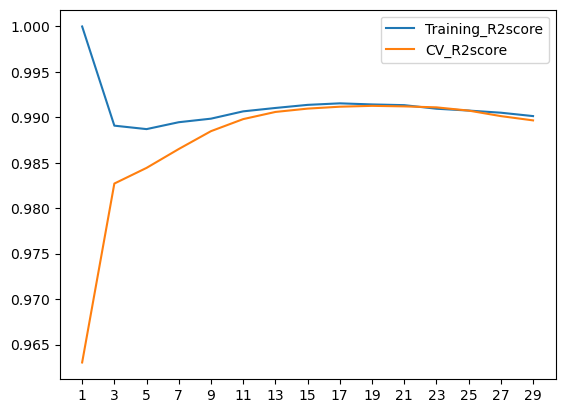

In [59]:
plt.plot(range(1,30,2),tr_r2score,label="Training_R2score")
plt.plot(range(1,30,2),cv_r2score,label="CV_R2score")
plt.xticks(range(1,30,2))
plt.legend()
plt.show()

We plotted the graph between training r2score and cv r2score 

we should choose the model where both the errors are less and the hyperparameter value is best

Because 
Hyperparameter value less underfitting model

Hyperparameter value high overfitting model

Hyperparameter value middle bestfitting model

So from the above graph we are choosing hyperparameter value as 7

In [60]:
final_r2score=0

knn=KNeighborsRegressor(n_neighbors=7)
final_model=knn.fit(x_trainp,y_train)
predicted_yi=final_model.predict(x_testp)
final_r2score=r2_score(y_test,predicted_yi)

In [61]:
final_r2score

0.9856558610549447

In [62]:
model=Pipeline([("PreProcess",ctp),("KNN Regressor",final_model)])

In [63]:
model

Pipeline(steps=[('PreProcess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputing_num',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Units_Sold', 'Unit_SellingPrice', 'Unit_MakingCost', 'Total_Revenue',
       'Total_Cost', 'Total_Profit', 'Order_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputing_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['Region', 'Country', 'Item_Type', 'Sales_Channel'], dtype='object'))])),
                ('KNN Regressor', KNeighborsRegressor(n_neighbors=7))])

In [64]:
pickle.dump(ctp,open(r"C:\Users\Tarun\Desktop\JOBS\PRUDENT\Hackathon\CTP.PKL","wb"))
pickle.dump(model,open(r"C:\Users\Tarun\Desktop\JOBS\PRUDENT\Hackathon\MODEL.PKL","wb"))

In [65]:
ctp=pickle.load(open(r"C:\Users\Tarun\Desktop\JOBS\PRUDENT\Hackathon\CTP.PKL","rb"))
model=pickle.load(open(r"C:\Users\Tarun\Desktop\JOBS\PRUDENT\Hackathon\MODEL.PKL","rb"))

In [66]:
ctp

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputing_num',
                                                  SimpleImputer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Units_Sold', 'Unit_SellingPrice', 'Unit_MakingCost', 'Total_Revenue',
       'Total_Cost', 'Total_Profit', 'Order_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('imputing_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OneHotEncoder())]),
                                 Index(['Region', 'Country', 'Item_Type', 'Sales_Channel'], dtype='object'))])

In [67]:
model

Pipeline(steps=[('PreProcess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputing_num',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Units_Sold', 'Unit_SellingPrice', 'Unit_MakingCost', 'Total_Revenue',
       'Total_Cost', 'Total_Profit', 'Order_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputing_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['Region', 'Country', 'Item_Type', 'Sales_Channel'], dtype='object'))])),
                ('KNN Regressor', KNeighborsRegressor(n_neighbors=7))])